# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Chile Pepper/train",
    label_mode="categorical",
    class_names= ['damaged','dried','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Chile Pepper/valid",
    label_mode="categorical",
    class_names= ['damaged','dried','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 1611 files belonging to 5 classes.
==========================Validation Data====================
Found 601 files belonging to 5 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256)

# --------------------
# Flow training images in batches of 1 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Chile Pepper/train",
                                                    batch_size=1,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Chile Pepper/valid",
                                                         batch_size=1,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 1611 images belonging to 5 classes.
Found 601 images belonging to 5 classes.


# DenseNet 1

In [4]:
# Load model
DenseNet121_Model1 = tf.keras.models.load_model('ChilePaper_DenseNet_model')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DenseNet121_Model1 = DenseNet121_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DenseNet121_Model1[1]*100))
print("Loss: %.6f%%" % (scores_DenseNet121_Model1[0]*100))

==========================Evaluate Model====================
601/601 [==============================] - 20s 22ms/step - loss: 0.1851 - accuracy: 0.9484
Accuracy: 94.841927%
Loss: 18.507145%


==========================Confusion Matrix====================
601/601 [==============================] - 13s 19ms/step


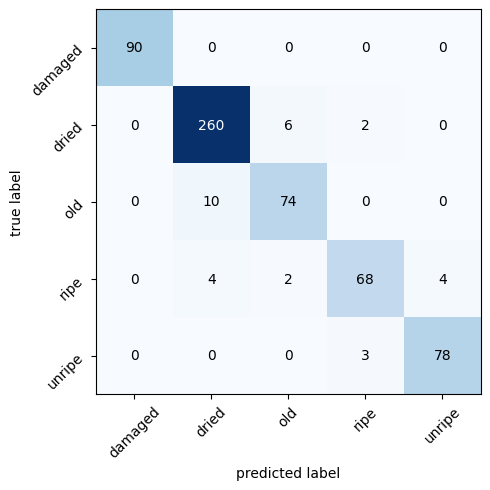

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00        90
       dried       0.95      0.97      0.96       268
         old       0.90      0.88      0.89        84
        ripe       0.93      0.87      0.90        78
      unripe       0.95      0.96      0.96        81

    accuracy                           0.95       601
   macro avg       0.95      0.94      0.94       601
weighted avg       0.95      0.95      0.95       601

==========================F1 Score====================
F1 Score :  0.9417386651071474


In [6]:
# Confusion Matrix and Classification Report
target_names = ['damaged','dried','old','ripe','unripe']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DenseNet121_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Chile_Paper_DenseNet1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Chile_Paper_DenseNet1)

# DenseNet 2

In [7]:
# load model
DenseNet121_Model2 = tf.keras.models.load_model('ChilePaper_DenseNet2_model')

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DenseNet121_Model2 = DenseNet121_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DenseNet121_Model2[1]*100))
print("Loss: %.6f%%" % (scores_DenseNet121_Model2[0]*100))

==========================Evaluate Model====================
601/601 [==============================] - 14s 21ms/step - loss: 0.1618 - accuracy: 0.9484
Accuracy: 94.841927%
Loss: 16.184105%


==========================Confusion Matrix====================
601/601 [==============================] - 14s 22ms/step


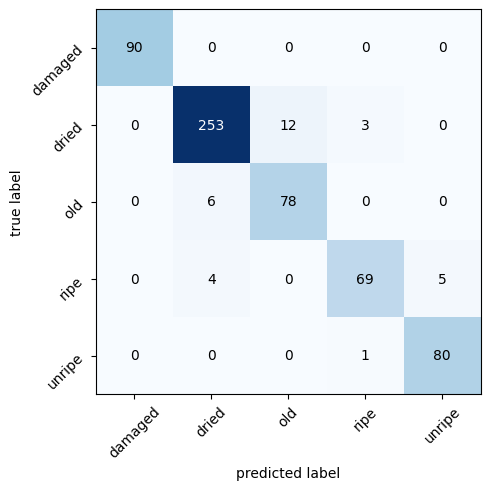

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00        90
       dried       0.96      0.94      0.95       268
         old       0.87      0.93      0.90        84
        ripe       0.95      0.88      0.91        78
      unripe       0.94      0.99      0.96        81

    accuracy                           0.95       601
   macro avg       0.94      0.95      0.95       601
weighted avg       0.95      0.95      0.95       601

==========================F1 Score====================
F1 Score :  0.9454466902617042


In [9]:
# Confusion Matrix and Classification Report
target_names = ['damaged','dried','old','ripe','unripe']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DenseNet121_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Chile_Paper_DenseNet2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Chile_Paper_DenseNet2)

# MobileNetV2 1

In [10]:
# load model
MobileNetV2_Model1 = tf.keras.models.load_model('ChilePaper_MobileNetV2_model')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNetV2_Model1 = MobileNetV2_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNetV2_Model1[1]*100))
print("Loss: %.6f%%" % (scores_MobileNetV2_Model1[0]*100))

==========================Evaluate Model====================
601/601 [==============================] - 7s 10ms/step - loss: 0.2585 - accuracy: 0.9251
Accuracy: 92.512476%
Loss: 25.853795%


==========================Confusion Matrix====================
601/601 [==============================] - 6s 9ms/step


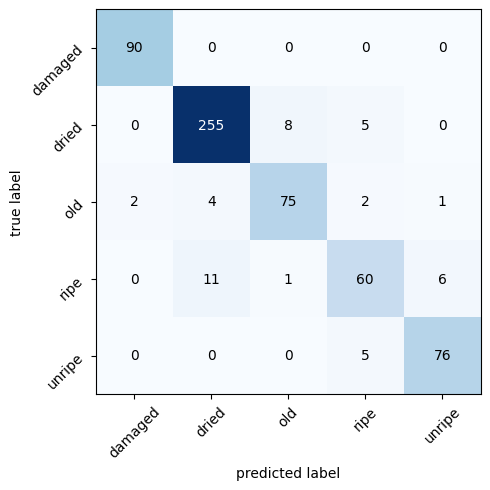

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       0.98      1.00      0.99        90
       dried       0.94      0.95      0.95       268
         old       0.89      0.89      0.89        84
        ripe       0.83      0.77      0.80        78
      unripe       0.92      0.94      0.93        81

    accuracy                           0.93       601
   macro avg       0.91      0.91      0.91       601
weighted avg       0.92      0.93      0.92       601

==========================F1 Score====================
F1 Score :  0.9113305580990774


In [12]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNetV2_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Chile_Paper_MobileNetV2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Chile_Paper_MobileNetV2)

# MobileNetV2 2

In [13]:
# load model
MobileNetV2_Model2 = tf.keras.models.load_model('ChilePaper_MobileNetV2_model2')

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNetV2_Model2 = MobileNetV2_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNetV2_Model2[1]*100))
print("Loss: %.6f%%" % (scores_MobileNetV2_Model2[0]*100))

==========================Evaluate Model====================
601/601 [==============================] - 7s 10ms/step - loss: 0.2705 - accuracy: 0.9351
Accuracy: 93.510813%
Loss: 27.050444%


==========================Confusion Matrix====================
601/601 [==============================] - 6s 10ms/step


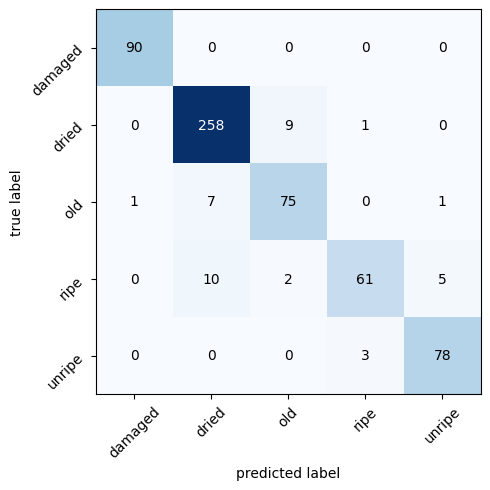

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       0.99      1.00      0.99        90
       dried       0.94      0.96      0.95       268
         old       0.87      0.89      0.88        84
        ripe       0.94      0.78      0.85        78
      unripe       0.93      0.96      0.95        81

    accuracy                           0.94       601
   macro avg       0.93      0.92      0.93       601
weighted avg       0.94      0.94      0.93       601

==========================F1 Score====================
F1 Score :  0.9251411441986678


In [15]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNetV2_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Chile_Paper_MobileNetV2_2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Chile_Paper_MobileNetV2_2)

# Xception 1

In [16]:
# load model
Xception_Model1 = tf.keras.models.load_model('ChilePaper_Xception_model')

In [17]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Model1 = Xception_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Model1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Model1[0]*100))

==========================Evaluate Model====================
601/601 [==============================] - 8s 11ms/step - loss: 0.2661 - accuracy: 0.9135
Accuracy: 91.347754%
Loss: 26.612681%


==========================Confusion Matrix====================
601/601 [==============================] - 6s 8ms/step


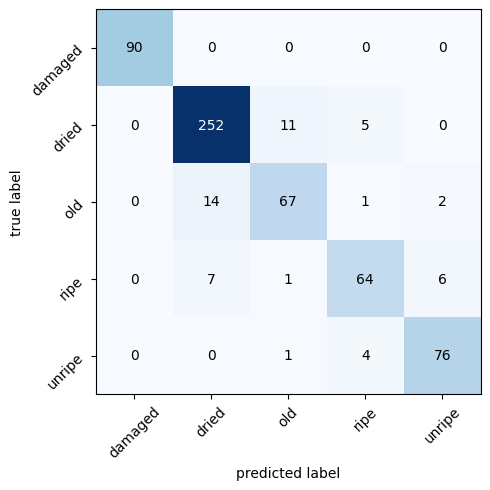

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00        90
       dried       0.92      0.94      0.93       268
         old       0.84      0.80      0.82        84
        ripe       0.86      0.82      0.84        78
      unripe       0.90      0.94      0.92        81

    accuracy                           0.91       601
   macro avg       0.91      0.90      0.90       601
weighted avg       0.91      0.91      0.91       601

==========================F1 Score====================
F1 Score :  0.90239973763772


In [18]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Chile_Paper_Xception = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Chile_Paper_Xception)

# Xception 2

In [19]:
# load model
Xception_Model2 = tf.keras.models.load_model('ChilePaper_Xception_model2')

In [20]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Model2 = Xception_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Model2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Model2[0]*100))

==========================Evaluate Model====================
601/601 [==============================] - 8s 11ms/step - loss: 0.2612 - accuracy: 0.9218
Accuracy: 92.179698%
Loss: 26.123106%


==========================Confusion Matrix====================
601/601 [==============================] - 6s 9ms/step


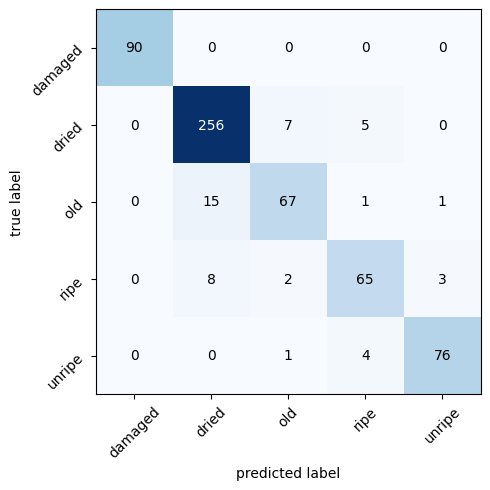

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00        90
       dried       0.92      0.96      0.94       268
         old       0.87      0.80      0.83        84
        ripe       0.87      0.83      0.85        78
      unripe       0.95      0.94      0.94        81

    accuracy                           0.92       601
   macro avg       0.92      0.90      0.91       601
weighted avg       0.92      0.92      0.92       601

==========================F1 Score====================
F1 Score :  0.9124170686741697


In [21]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Chile_Paper_Xception2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Chile_Paper_Xception2)

# Comparison

In [22]:
# Make dictionary of all models
models = {
    "DenseNet121_Model1":DenseNet121_Model1,
    "DenseNet121_Model2":DenseNet121_Model2,
    "MobileNetV2_Model1":MobileNetV2_Model1,
    "MobileNetV2_Model2":MobileNetV2_Model2,
    "Xception_Model1":Xception_Model1,
    "Xception_Model2":Xception_Model2
}

# Make dictionary of all accuracy
accuracy = {
    "DenseNet121_Model1":scores_DenseNet121_Model1[1]*100,
    "DenseNet121_Model2":scores_DenseNet121_Model2[1]*100,
    "MobileNetV2_Model1":scores_MobileNetV2_Model1[1]*100,
    "MobileNetV2_Model2":scores_MobileNetV2_Model2[1]*100,
    "Xception_Model1":scores_Xception_Model1[1]*100,
    "Xception_Model2":scores_Xception_Model2[1]*100
}

# Make dictionary of all loss
loss = {
    "DenseNet121_Model1":scores_DenseNet121_Model1[0]*100,
    "DenseNet121_Model2":scores_DenseNet121_Model2[0]*100,
    "MobileNetV2_Model1":scores_MobileNetV2_Model1[0]*100,
    "MobileNetV2_Model2":scores_MobileNetV2_Model2[0]*100,
    "Xception_Model1":scores_Xception_Model1[0]*100,
    "Xception_Model2":scores_Xception_Model2[0]*100
}

# Make dictionary of all F1 Score
f1_score = {
    "DenseNet121_Model1":f1_Chile_Paper_DenseNet1,
    "DenseNet121_Model2":f1_Chile_Paper_DenseNet2,
    "MobileNetV2_Model1":f1_Chile_Paper_MobileNetV2,
    "MobileNetV2_Model2":f1_Chile_Paper_MobileNetV2_2,
    "Xception_Model1":f1_Chile_Paper_Xception,
    "Xception_Model2":f1_Chile_Paper_Xception2
}

# Make dataframe of all models, accuracy and loss
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values(), f1_score.values())), columns =['Model', 'Accuracy', 'Loss', 'F1'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model   Accuracy       Loss        F1
0  DenseNet121_Model1  94.841927  18.507145  0.941739
1  DenseNet121_Model2  94.841927  16.184105  0.945447
3  MobileNetV2_Model2  93.510813  27.050444  0.925141
2  MobileNetV2_Model1  92.512476  25.853795  0.911331
5     Xception_Model2  92.179698  26.123106  0.912417
4     Xception_Model1  91.347754  26.612681  0.902400


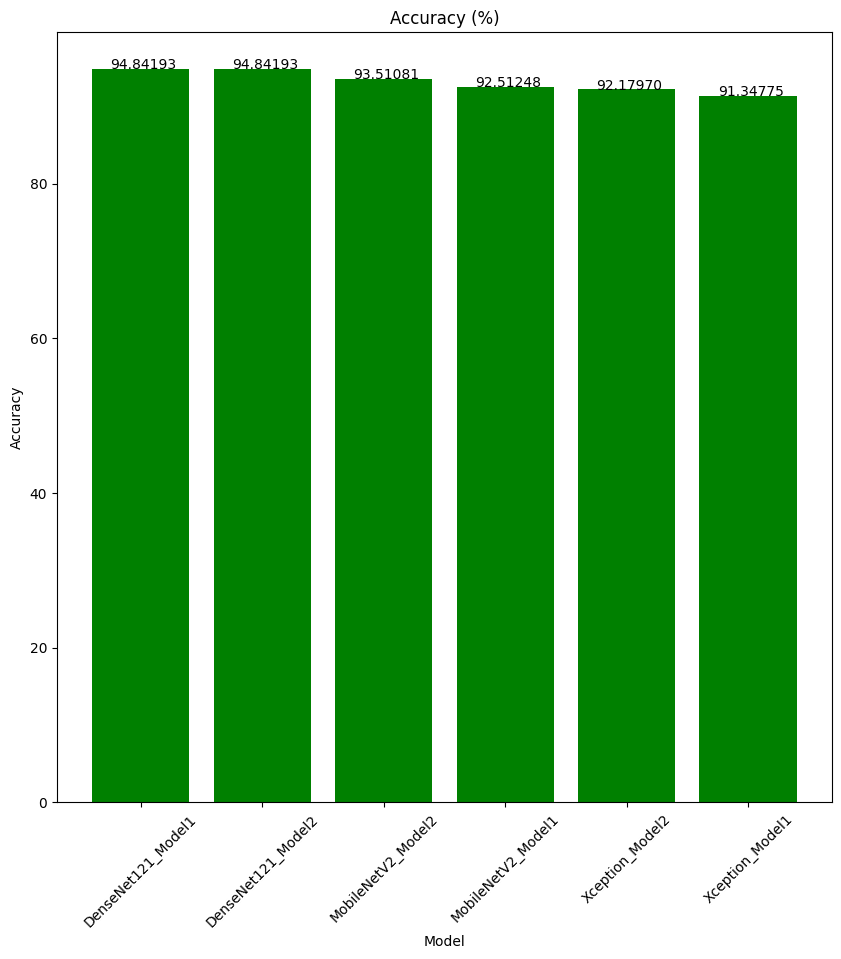

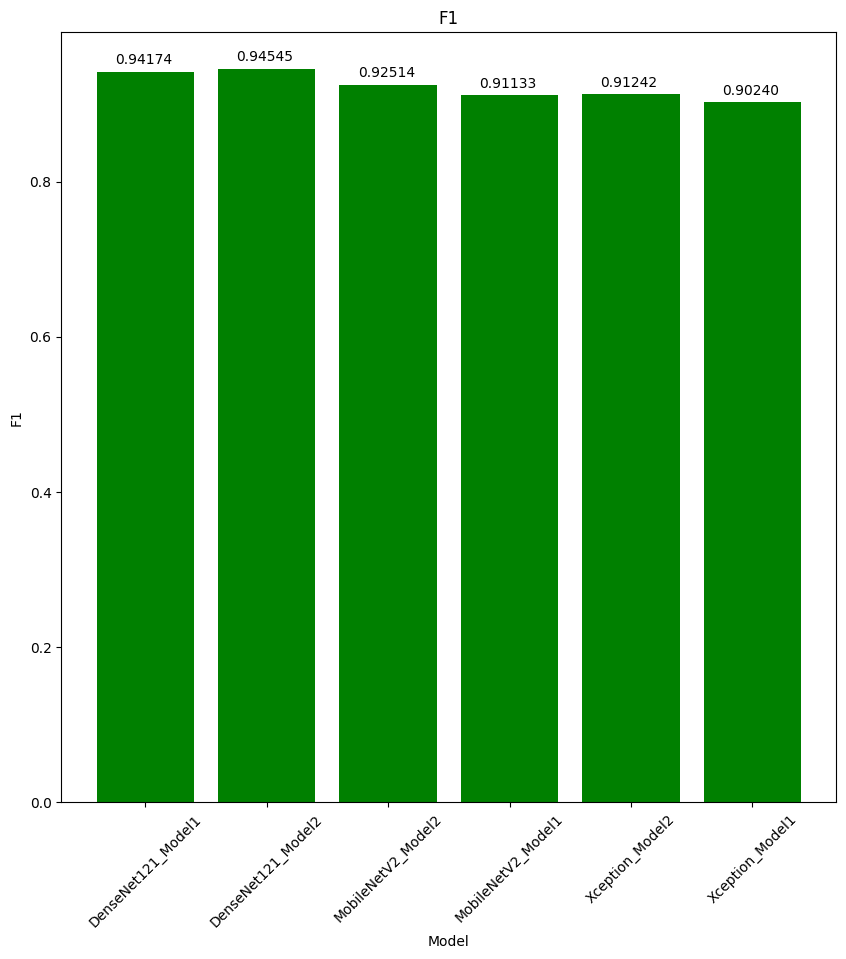

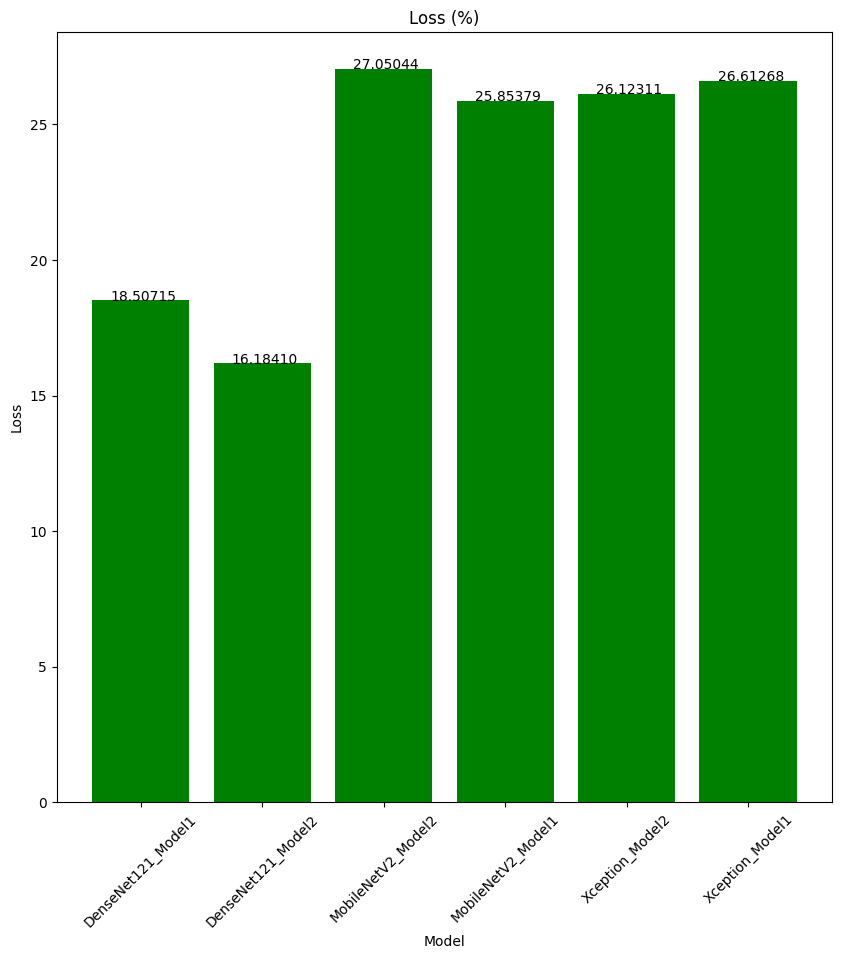

In [23]:
# make multiple plots for accuracy, f1 and loss with annotations
# Accuracy
plt.figure(figsize=(10, 10))
plt.title('Accuracy (%)')
plt.bar(df['Model'], df['Accuracy'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['Accuracy']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# F1
plt.figure(figsize=(10, 10))
plt.title('F1')
plt.bar(df['Model'], df['F1'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['F1']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('F1')
plt.show()

# Loss
plt.figure(figsize=(10, 10))
plt.title('Loss (%)')
plt.bar(df['Model'], df['Loss'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['Loss']):
    plt.text(i - 0.25, v + 0.0005, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('Loss')
plt.show()